In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [444]:
import warnings
warnings.filterwarnings("ignore")

In [176]:
df = pd.read_csv('aotizhongxin.csv')

In [177]:
df.shape

(35064, 18)

In [178]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


# Data Preprocessing

In [179]:
# assemble a new "datetime" column
df['datetime'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=df['day'], hour=df['hour']))

In [180]:
# assemble a new "date" column
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=df['day']))

In [181]:
df.head(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,2013-03-01


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     34139 non-null  float64       
 6   PM10      34346 non-null  float64       
 7   SO2       34129 non-null  float64       
 8   NO2       34041 non-null  float64       
 9   CO        33288 non-null  float64       
 10  O3        33345 non-null  float64       
 11  TEMP      35044 non-null  float64       
 12  PRES      35044 non-null  float64       
 13  DEWP      35044 non-null  float64       
 14  RAIN      35044 non-null  float64       
 15  wd        34983 non-null  object        
 16  WSPM      35050 non-null  float64       
 17  station   35

In [183]:
# set "datetime" as index
df.set_index('datetime', inplace=True)

In [184]:
df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [185]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'date'],
      dtype='object')

In [186]:
# drop some columns
df.drop(columns=['No', 'year', 'month', 'day', 'hour', 'PM10', 'PRES', 'DEWP', 'wd', 'WSPM', 'station', 'date'], inplace=True)

In [187]:
df.head(2)

,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN
datetime,,,,,,,
2013-03-01 00:00:00,4.0,4.0,7.0,300.0,77.0,-0.7,0.0
2013-03-01 01:00:00,8.0,4.0,7.0,300.0,77.0,-1.1,0.0


In [188]:
# df.to_csv('df_cleaned')

### Missing values

In [189]:
df.isnull().sum()

PM2.5     925
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
RAIN       20
dtype: int64

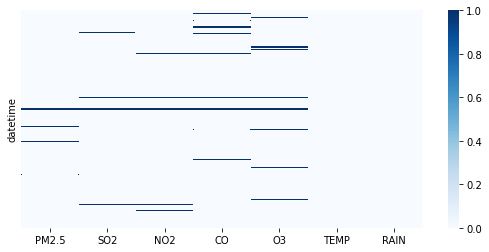

In [190]:
plt.figure(figsize=(9,4))
sns.heatmap(df.isnull(), yticklabels=False, cmap="Blues")

In [191]:
# identify the variables with missing observations

vars_with_na = [var for var in df.columns if df[var].isnull().mean() > 0]
vars_with_na

# all variables contain missing values

['PM2.5', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN']

In [192]:
# let's find out whether they are numerical or categorical
df[vars_with_na].dtypes

PM2.5    float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
RAIN     float64
dtype: object

In [193]:
# the percentage of observations missing per variable

df_na = df[vars_with_na].isnull().mean()

# transform the array into a dataframe
df_na = pd.DataFrame(df_na.reset_index())

# add column names to the dataframe
df_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
df_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
df_na

,variable,na_percentage
3,CO,0.050650
4,O3,0.049025
2,NO2,0.029175
1,SO2,0.026666
0,PM2.5,0.026380
5,TEMP,0.000570
6,RAIN,0.000570


In [194]:
# almost all of the variables' missing values are well below 5%

##### (figure out the suitable imputation method)

In [195]:
# in order to determine the suitable imputation method, we have to determine
# if trend and seasonality are present in the dataset

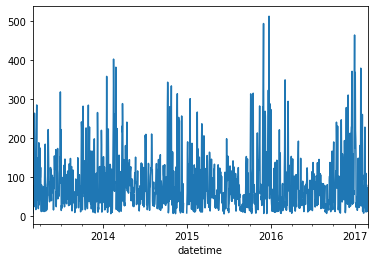

In [196]:
# daily mean PM2.5
df['PM2.5'].resample(rule='D').mean().plot();

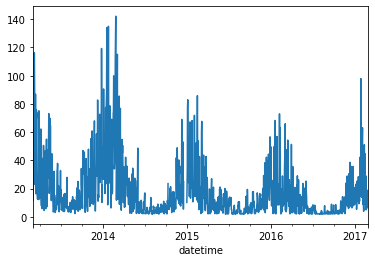

In [197]:
# daily mean SO2
df['SO2'].resample(rule='D').mean().plot();

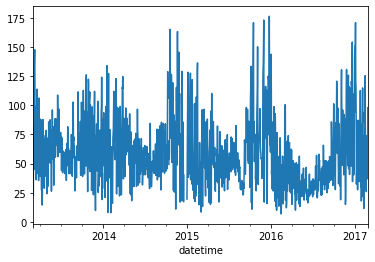

In [198]:
# daily mean NO2
df['NO2'].resample(rule='D').mean().plot();

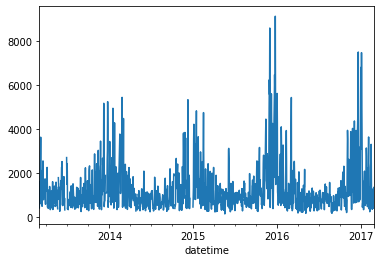

In [199]:
# daily mean CO
df['CO'].resample(rule='D').mean().plot();

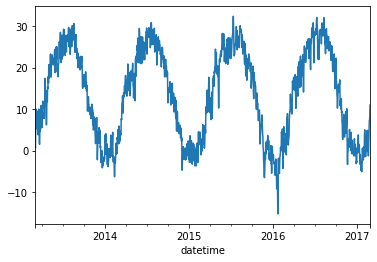

In [200]:
# daily mean temp
df['TEMP'].resample(rule='D').mean().plot();

In [153]:
# there is a slight presence of trend
# and there is a clear presence of seasonality
# therefore, we decide to use the "seasonal adjustment + linear interpolation" imputation method

In [201]:
# save a copy of data for future use
df_before_interpolated = df.copy()

In [202]:
df.interpolate(method='time', inplace=True)

In [203]:
# check if NAs are still present
df.isnull().sum()

PM2.5    0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
RAIN     0
dtype: int64

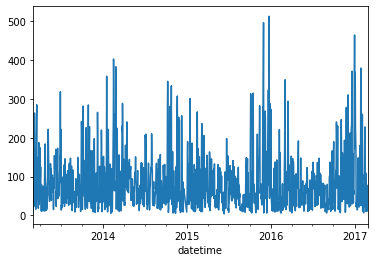

In [204]:
# check the graphs
# daily mean PM2.5
df['PM2.5'].resample(rule='D').mean().plot();

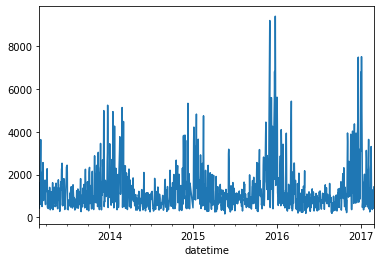

In [205]:
# daily mean CO
df['CO'].resample(rule='D').mean().plot();

In [206]:
# df.to_csv('df_interpolated.csv')

---

# EDA

### Check distributions of numeric variables

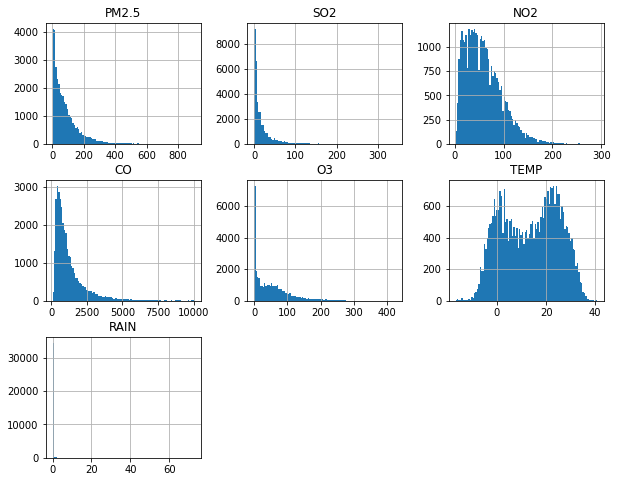

In [207]:
# check the distribution of independent variables
df.hist(bins=100, figsize=[10, 8])
plt.show()

# varaibles are seem fine, although all skewed which is understandable
# however, certain variables are extremely skewed or dominated by extreme values:
# SO2, O3, and RAIN

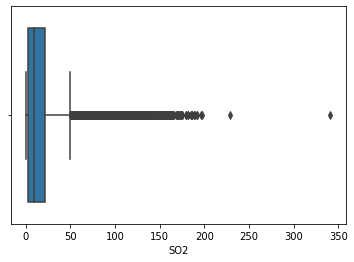

In [208]:
# dig further into those variables
# check "SO2"
ax = sns.boxplot(data=df, x='SO2')

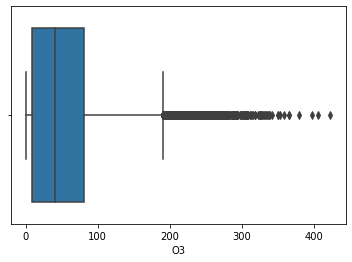

In [209]:
# check "O3"
ax = sns.boxplot(data=df, x='O3')

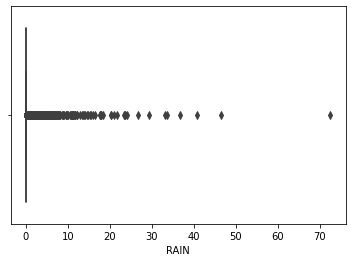

In [210]:
# check "RAIN"
ax = sns.boxplot(data=df, x='RAIN')

In [213]:
# hypothesis: not outliers, because weather in Beijing can get extreme ("RAIN")
# test: check the correlation among those extreme values

In [214]:
# function to define extreme values boundaries
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [215]:
# find limits for SO2

SO2_upper_limit, SO2_lower_limit = find_skewed_boundaries(df, 'SO2', 1.5)
SO2_upper_limit, SO2_lower_limit

(50.5, -25.5)

In [216]:
# find limits for O3

O3_upper_limit, O3_lower_limit = find_skewed_boundaries(df, 'O3', 1.5)
O3_upper_limit, O3_lower_limit

(190.5, -101.5)

In [221]:
# find limits for RAIN

RAIN_upper_limit, RAIN_lower_limit = find_skewed_boundaries(df, 'RAIN', 1.5)
RAIN_upper_limit, RAIN_lower_limit

(0.0, 0.0)

In [222]:
# let's flag the outliers in those 3 variables:

outliers_SO2 = np.where(df['SO2'] > SO2_upper_limit, True,
                       np.where(df['SO2'] < SO2_lower_limit, True, False))

In [223]:
outliers_O3 = np.where(df['O3'] > O3_upper_limit, True,
                       np.where(df['O3'] < O3_lower_limit, True, False))

In [224]:
outliers_RAIN = np.where(df['RAIN'] > RAIN_upper_limit, True,
                       np.where(df['RAIN'] < RAIN_lower_limit, True, False))

In [232]:
# when SO2 excessive
when_SO2_excessive = df.loc[(outliers_SO2), ]

In [233]:
# when O3 excessive
when_O3_excessive = df.loc[(outliers_O3), ]

In [242]:
# when SO2 and O3 excessive
when_SO2_O3_excessive = df.loc[(outliers_SO2 + outliers_O3), ]

In [234]:
# when RAIN excessive
when_RAIN_excessive = df.loc[(outliers_RAIN), ]

In [235]:
when_SO2_excessive.shape, when_RAIN_excessive.shape

((2864, 7), (1380, 7))

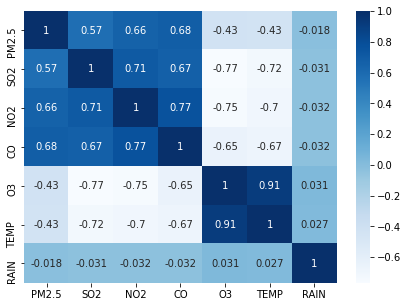

In [245]:
# when SO2 or O3 excessive
corr = when_SO2_O3_excessive.corr()
plt.figure(figsize = (7,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap='Blues');

# compare to the entire dataset, when SO2 and O3 excessive, other pollutant airs tend to move together
# notably, temperature seems to play an important role

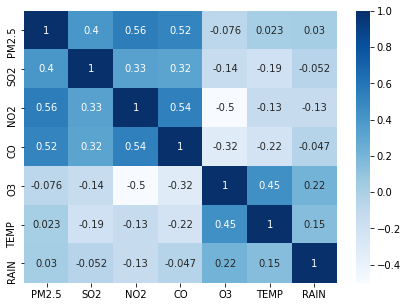

In [247]:
# when RAIN excessive
corr = when_RAIN_excessive.corr()
plt.figure(figsize = (7,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap='Blues');

# as expected, downpour usually drives away pollutant air

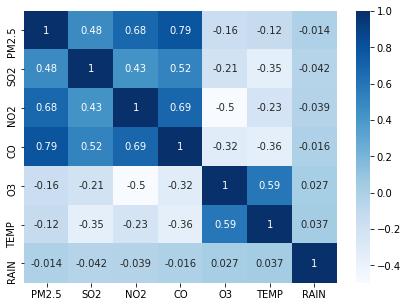

In [249]:
# correlation on the entire dataset
corr = df.corr()
plt.figure(figsize = (7,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap='Blues');

In [252]:
df.head(2)

,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN
datetime,,,,,,,
2013-03-01 00:00:00,4.0,4.0,7.0,300.0,77.0,-0.7,0.0
2013-03-01 01:00:00,8.0,4.0,7.0,300.0,77.0,-1.1,0.0


### Check relationships among independent variables

In [259]:
# one of the insights is that pollutant air has strong correlation with the temperature
# then let's check the correlation between toxic airs and temperature

Text(0, 0.5, 'SO2')

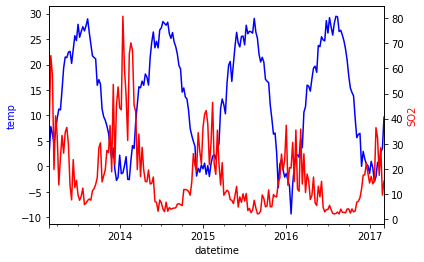

In [275]:
# temp vs. SO2
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('temp', color='blue')
ax2 = ax.twinx()
ax2 = df['SO2'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('SO2', color='red')

# clearly negatively correlated!!!

Text(0, 0.5, 'CO')

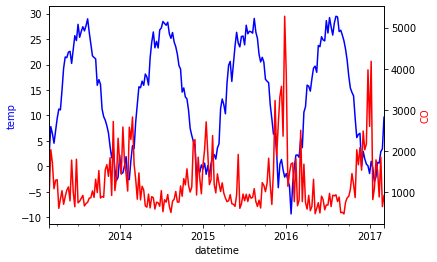

In [276]:
# temp vs. CO
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('temp', color='blue')
ax2 = ax.twinx()
ax2 = df['CO'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('CO', color='red')

# clearly negatively correlated

Text(0, 0.5, 'PM2.5')

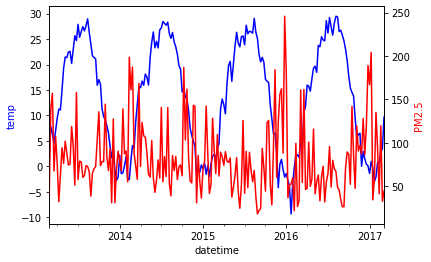

In [278]:
# temp vs. PM2.5
fig, ax = plt.subplots()

ax1 = df['TEMP'].resample(rule='W').mean().plot(color='blue');
ax.set_ylabel('temp', color='blue')
ax2 = ax.twinx()
ax2 = df['PM2.5'].resample(rule='W').mean().plot(color='red');
ax2.set_ylabel('PM2.5', color='red')

# the trend of PM2.5 is not as straightforward

Text(0, 0.5, 'SO2')

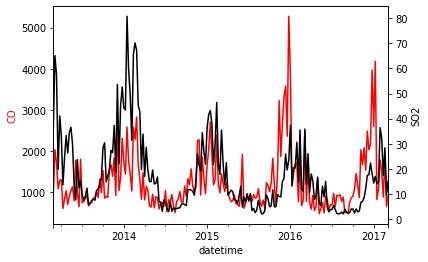

In [280]:
# pollutants: SO2 & CO
fig, ax = plt.subplots()

ax1 = df['CO'].resample(rule='W').mean().plot(color='red')
ax.set_ylabel('CO', color='red')
ax2 = ax.twinx()
ax2 = df['SO2'].resample(rule='W').mean().plot(color='black')
ax2.set_ylabel('SO2', color='black')

# extremely positively correlated

Text(0, 0.5, 'SO2')

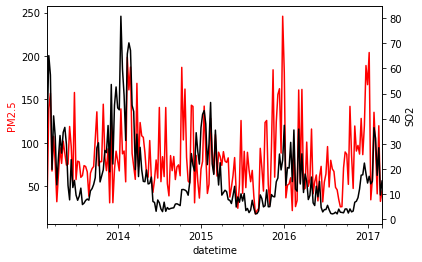

In [281]:
# SO2 & PM2.5

fig, ax = plt.subplots()

ax1 = df['PM2.5'].resample(rule='W').mean().plot(color='red')
ax.set_ylabel('PM2.5', color='red')
ax2 = ax.twinx()
ax2 = df['SO2'].resample(rule='W').mean().plot(color='black')
ax2.set_ylabel('SO2', color='black')

# positively correlated, but harder to tell

Text(0, 0.5, 'SO2')

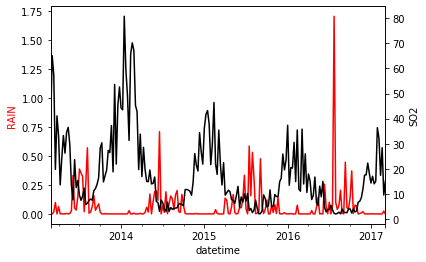

In [282]:
# SO2 vs. RAIN
fig, ax = plt.subplots()

ax1 = df['RAIN'].resample(rule='W').mean().plot(color='red')
ax.set_ylabel('RAIN', color='red')
ax2 = ax.twinx()
ax2 = df['SO2'].resample(rule='W').mean().plot(color='black')
ax2.set_ylabel('SO2', color='black')

# negatively correlated

### Check aginst temporal factors

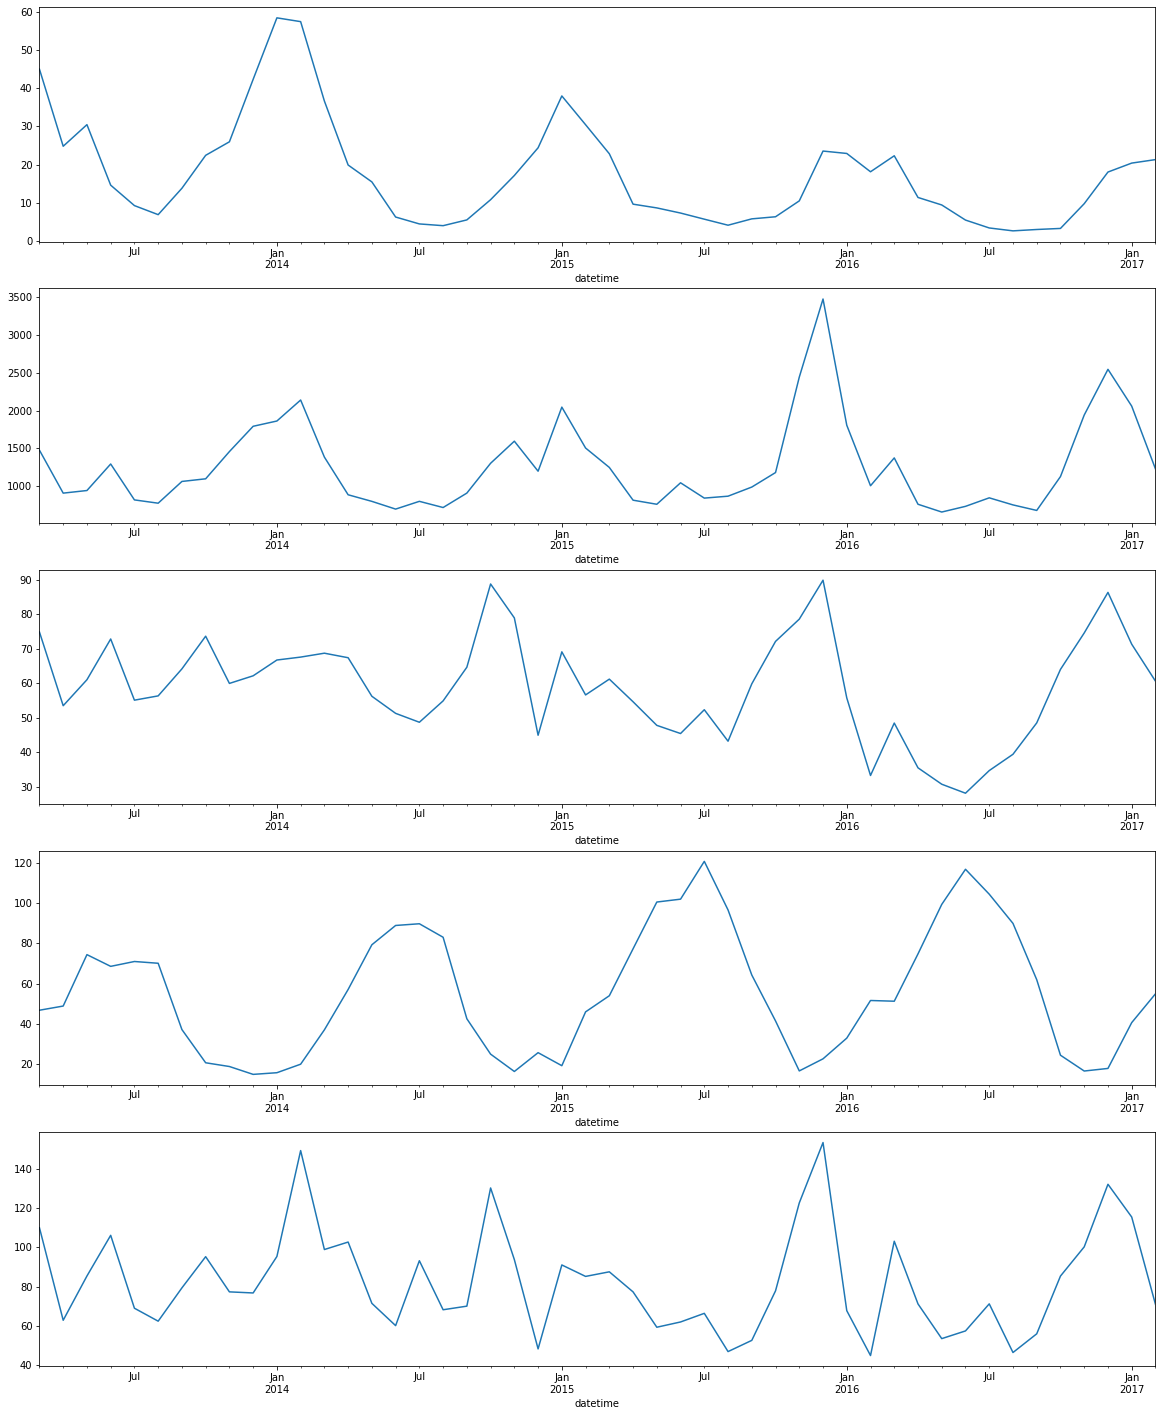

In [299]:
# pollutants mean values weekly data over 4 years

plt.figure(figsize=[20,25])
plt.subplot(511)
df['SO2'].resample(rule='M').mean().plot()
plt.subplot(512)
df['CO'].resample(rule='M').mean().plot()
plt.subplot(513)
df['NO2'].resample(rule='M').mean().plot()
plt.subplot(514)
df['O3'].resample(rule='M').mean().plot()
plt.subplot(515)
df['PM2.5'].resample(rule='M').mean().plot();

# all pollutants show seasonality
# only SO2 shows a clear decreasing trend

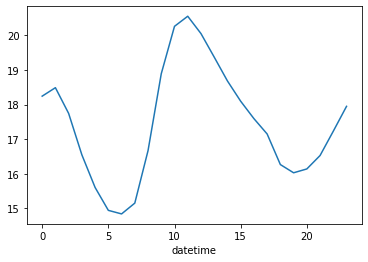

In [371]:
# pollutants vs hour
df.groupby([df.index.hour])['SO2'].mean().plot();

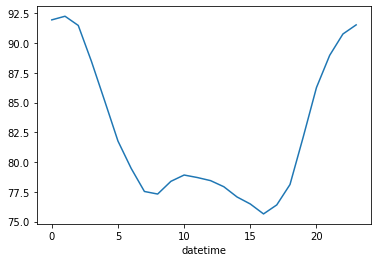

In [372]:
df.groupby([df.index.hour])['PM2.5'].mean().plot();

In [297]:
# the focuses of this research are the prediction of SO2 and PM2.5
# so from now, we only study these 2 variables

### ETS Decomposition

In [300]:
from statsmodels.tsa.seasonal import seasonal_decompose

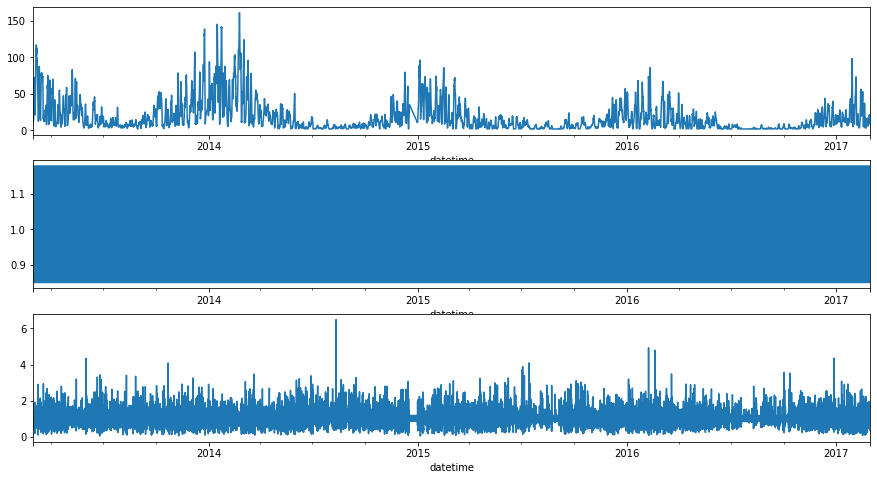

In [323]:
# SO2
res = seasonal_decompose(df['SO2'], model='mul')

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1)
res.seasonal.plot(ax=ax2)
res.resid.plot(ax=ax3)

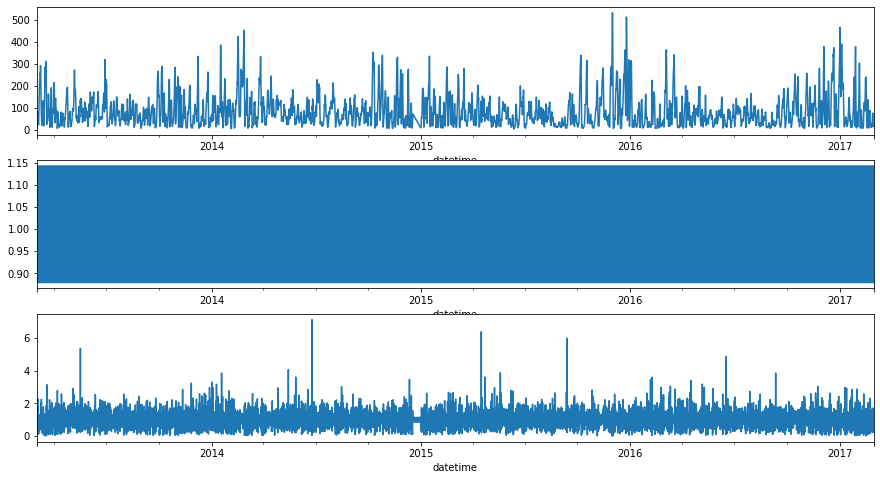

In [324]:
res = seasonal_decompose(df['PM2.5'], model='mul')

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1)
res.seasonal.plot(ax=ax2)
res.resid.plot(ax=ax3)

### ACF & PACF

In [347]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

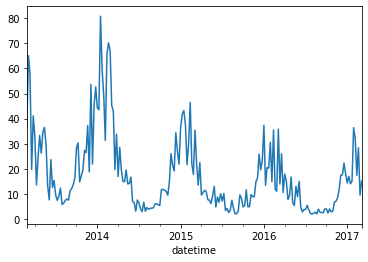

In [364]:
# SO2 weekly mean values
df_SO2_weekly = df['SO2'].resample(rule='W').mean()
df_SO2_weekly.plot();

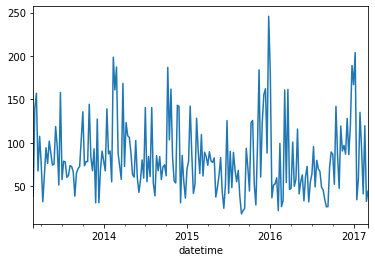

In [349]:
# PM2.5 weekly mean values
df_PM_weekly = df['PM2.5'].resample(rule='W').mean()
df_PM_weekly.plot();

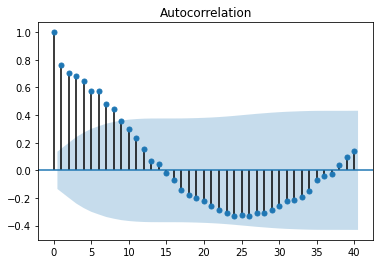

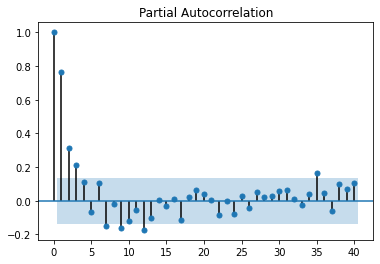

In [359]:
# SO2
plot_acf(df_SO2_weekly, title='Autocorrelation', lags=40)
plot_pacf(df_SO2_weekly, title='Partial Autocorrelation', lags=40);

# from ACF >> clear seasonality

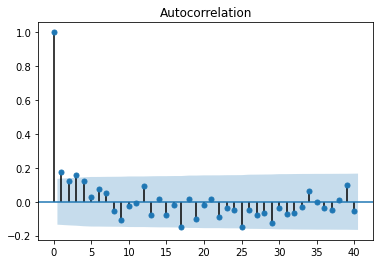

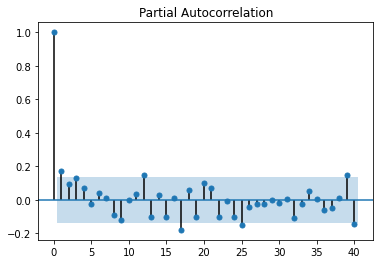

In [360]:
# PM2.5
plot_acf(df_PM_weekly, title='Autocorrelation', lags=40)
plot_pacf(df_PM_weekly, title='Partial Autocorrelation', lags=40);

### Exposing seasonality with month plots

In [392]:
from statsmodels.graphics.tsaplots import month_plot

In [422]:
# change df freq from second to month for the purpose of month_plot
df_month = df.resample(rule='MS').mean()
df_month.head(2)

,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN
datetime,,,,,,,
2013-03-01,110.092742,44.945068,74.817409,1477.730511,46.810691,6.053629,0.026210
2013-04-01,62.751389,24.796646,53.501374,910.012500,48.888799,12.260694,0.015139


In [423]:
df_month.index

DatetimeIndex(['2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01'],
              dtype='datetime64[ns]', name='datetime', freq='MS')

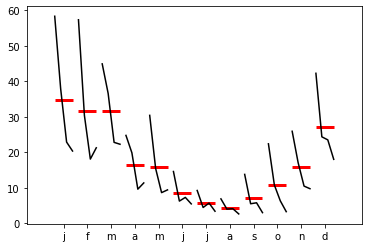

In [427]:
# SO2
month_plot(df_month['SO2']);

# clear seasonality

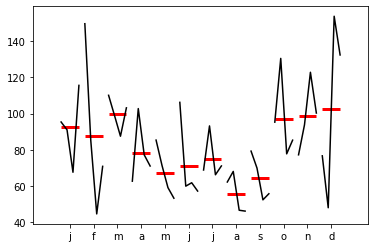

In [428]:
# PM2.5
month_plot(df_month['PM2.5']);

# seasonality not that clear, but in general, lower in the summer months

### Stationarity: Test & Transform

In [380]:
# we'll use the augmented Dickey-Fuller test to confirm stationarity

In [374]:
# function for runnin the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [378]:
# run the DF test on SO2
adf_test(df['SO2'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.371200e+01
p-value                 1.232716e-25
# lags used             4.800000e+01
# observations          3.501500e+04
critical value (1%)    -3.430537e+00
critical value (5%)    -2.861623e+00
critical value (10%)   -2.566814e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [379]:
adf_test(df['PM2.5'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -19.116987
p-value                     0.000000
# lags used                51.000000
# observations          35012.000000
critical value (1%)        -3.430537
critical value (5%)        -2.861623
critical value (10%)       -2.566814
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [382]:
# both variables are stationary, thus, suitable for further time series modeling

In [464]:
# to simplify the problem and avoid overfitting, use df as daily frequency
df = df.resample(rule='M').mean()

In [465]:
df.head(2)

,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN
datetime,,,,,,,
2013-03-31,110.092742,44.945068,74.817409,1477.730511,46.810691,6.053629,0.026210
2013-04-30,62.751389,24.796646,53.501374,910.012500,48.888799,12.260694,0.015139


In [466]:
df.index

DatetimeIndex(['2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30',
               '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28'],
              dtype='datetime64[ns]', name='datetime', freq='M')

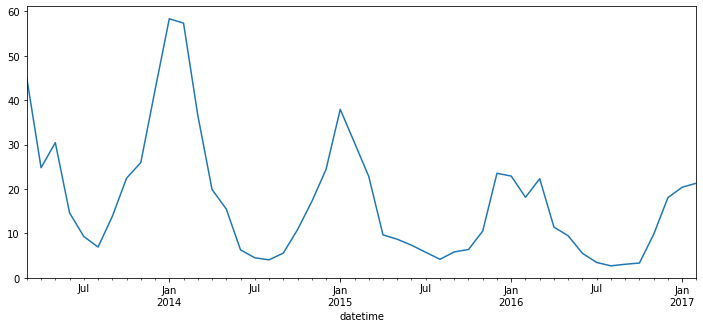

In [467]:
# check graphs
df['SO2'].plot(figsize=(12,5));

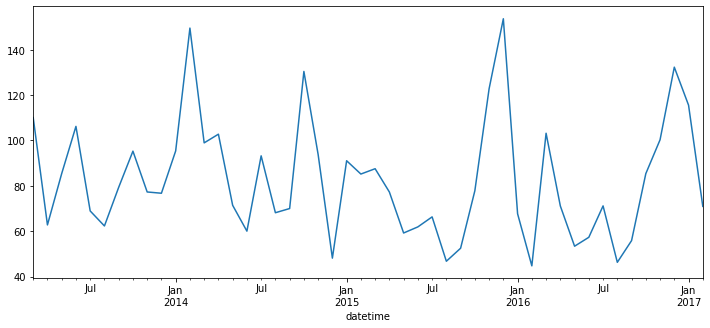

In [468]:
df['PM2.5'].plot(figsize=(12,5));

# Modelling

In [469]:
# load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [471]:
df.shape

(48, 7)

##### (Split the data into train/test sets)

In [492]:
# we intend to do a 3-month prediction
# so we'll save 3 data points for test set
train = df.iloc[:45]
test = df.iloc[45:]

##### (Plot the source data)

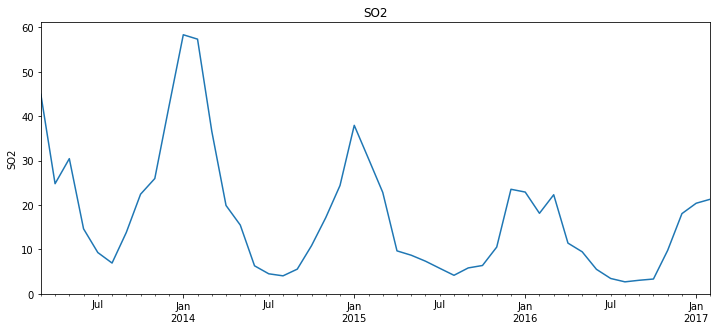

In [493]:
# SO2
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'SO2'
ylabel='SO2'
xlabel=''

ax = df['SO2'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

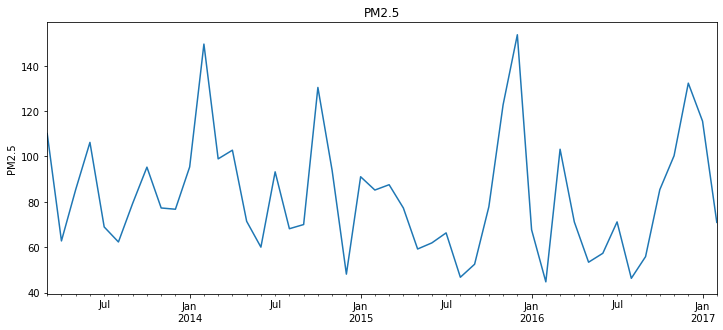

In [494]:
# PM2.5
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'PM2.5'
ylabel='PM2.5'
xlabel=''

ax = df['PM2.5'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### ARIMA

##### (Determine the (p,d,q) ARIMA orders using pmdarima.auto_arima)

In [495]:
# SO2
auto_arima(df['SO2'], seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -160.624
Date:                Fri, 02 Oct 2020   AIC                            331.248
Time:                        16:03:26   BIC                            340.604
Sample:                             0   HQIC                           334.784
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2961      2.676      2.353      0.019       1.052      11.541
ar.L1          1.0444      0.105      9.934      0.000       0.838       1.250
ar.L2         -0.0570      0.172     -0.331      0.741      -0.394       0.280
ar.L3         -0.3325      0.135     -2.464      0.014      -0.597      -0.068
sigma2        45.3485     10.411      4.356      0.000      24.942      65.754
===================================================================================
Ljung-Box (Q):                       32.14   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.81   Prob(JB):                         0.10
Heteroskedasticity (H):               0.27   Skew:                             0.74
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [496]:
# PM2.5
auto_arima(df['PM2.5'], seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -219.942
Date:                Fri, 02 Oct 2020   AIC                            445.884
Time:                        16:03:29   BIC                            451.498
Sample:                             0   HQIC                           448.005
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     82.7837      6.341     13.055      0.000      70.355      95.212
ma.L1          0.6087      0.136      4.473      0.000       0.342       0.875
sigma2       553.7703    133.477      4.149      0.000     292.160     815.380
===================================================================================
Ljung-Box (Q):                       39.96   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.47   Prob(JB):                         0.26
Heteroskedasticity (H):               1.28   Skew:                             0.57
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### (Fit a ARIMA model)

In [497]:
# SO2
model = ARIMA(train['SO2'], order=(3,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    SO2   No. Observations:                   45
Model:                     ARMA(3, 0)   Log Likelihood                -151.874
Method:                       css-mle   S.D. of innovations              6.918
Date:                Fri, 02 Oct 2020   AIC                            313.747
Time:                        16:03:36   BIC                            322.781
Sample:                    03-31-2013   HQIC                           317.115
                         - 11-30-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3992      3.022      6.088      0.000      12.476      24.322
ar.L1.SO2      1.0413      0.161      6.485      0.000       0.727       1.356
ar.L2.SO2     -0.0425      0.248     -0.171      0.864      -0.529       0.444
ar.L3.SO2     -0.3443      0.162     -2.127      0.033      -0.662      -0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0152           -0.5639j            1.1613           -0.0807
AR.2            1.0152           +0.5639j            1.1613            0.0807
AR.3           -2.1539           -0.0000j            2.1539           -0.5000
-----------------------------------------------------------------------------
"""

In [498]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(4,1,5) Predictions')

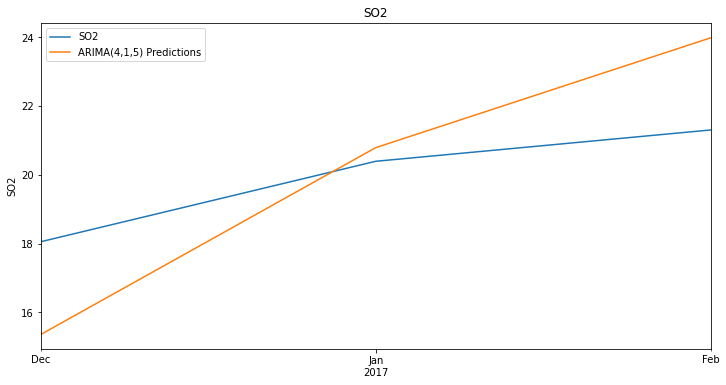

In [499]:
# Plot predictions against known values
title = 'SO2'
ylabel = 'SO2'
xlabel = ''

ax = test['SO2'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [501]:
# PM2.5
model = ARIMA(train['PM2.5'], order=(0,0,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                   45
Model:                     ARMA(0, 1)   Log Likelihood                -205.823
Method:                       css-mle   S.D. of innovations             23.350
Date:                Fri, 02 Oct 2020   AIC                            417.645
Time:                        16:03:49   BIC                            423.065
Sample:                    03-31-2013   HQIC                           419.666
                         - 11-30-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          81.6072      5.409     15.086      0.000      71.005      92.210
ma.L1.PM2.5     0.5658      0.151      3.756      0.000       0.271       0.861
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.7674           +0.0000j            1.7674            0.5000
-----------------------------------------------------------------------------
"""

In [502]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,0,1) Predictions')

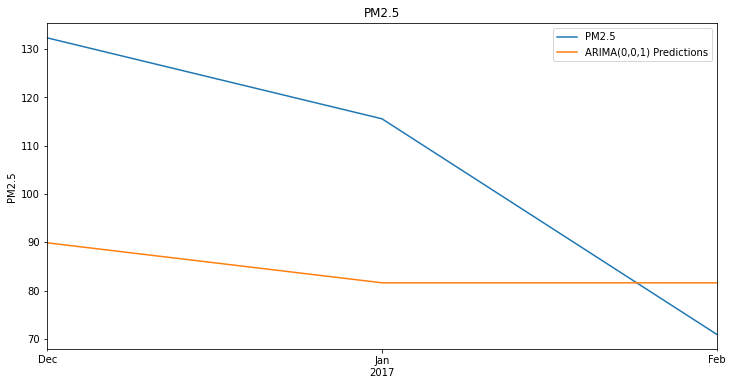

In [503]:
# Plot predictions against known values
title = 'PM2.5'
ylabel = 'PM2.5'
xlabel = ''

ax = test['PM2.5'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

##### (Evaluate the model)

In [504]:
# SO2
# MSE
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['SO2'], predictions)
print(f'ARIMA(3,0,0) MSE Error: {error:11.10}')

ARIMA(3,0,0) MSE Error: 4180.865149


In [505]:
# RMSE
from statsmodels.tools.eval_measures import rmse

error = rmse(test['SO2'], predictions)
print(f'ARIMA(3,0,0) RMSE Error: {error:11.10}')

ARIMA(3,0,0) RMSE Error: 64.65960987


##### (Retrain the model on the full data, and forecast the future)

In [514]:
# SO2
model = ARIMA(df['SO2'],order=(3,0,0))
results = model.fit()
fcast = results.predict(len(df),len(df)+3,typ='levels').rename('ARIMA(3,0,0) Forecast')

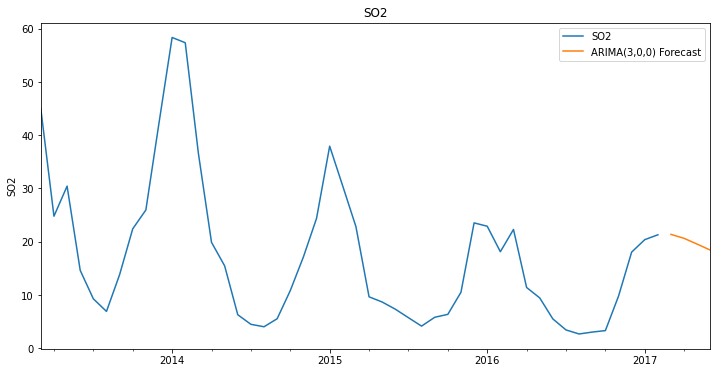

In [515]:
# Plot predictions against known values
title = 'SO2'
ylabel='SO2'
xlabel=''

ax = df['SO2'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [517]:
# PM2.5
model = ARIMA(df['PM2.5'],order=(0,0,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+3,typ='levels').rename('ARIMA(0,0,1) Forecast')

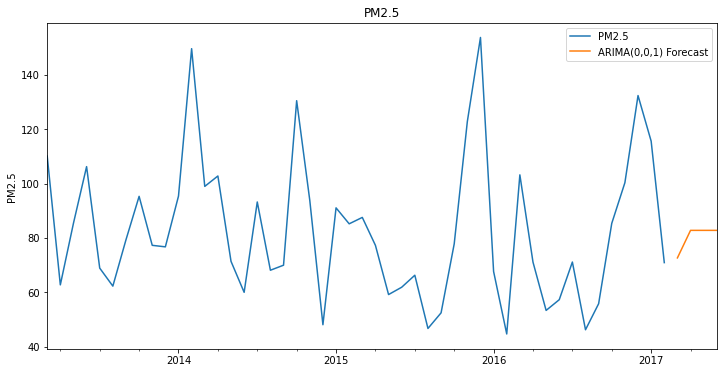

In [518]:
# Plot predictions against known values
title = 'PM2.5'
ylabel='PM2.5'
xlabel=''

ax = df['PM2.5'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### SARIMAX

##### (Determine the SARIMAX orders)

In [522]:
# SO2
auto_arima(df['SO2'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -153.107
Date:                            Fri, 02 Oct 2020   AIC                            314.215
Time:                                    16:13:01   BIC                            321.700
Sample:                                         0   HQIC                           317.043
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8052      0.760      1.059      0.290      -0.685       2.295
ar.L1          0.8102      0.091      8.950      0.000       0.633       0.988
ar.S.L12       0.8008      0.063     12.620      0.000       0.676       0.925
sigma2        26.0571      5.653      4.609      0.000      14.977      37.138
===================================================================================
Ljung-Box (Q):                       49.94   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.13   Prob(JB):                         0.96
Heteroskedasticity (H):               0.42   Skew:                            -0.09
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [523]:
# PM2.5
auto_arima(df['PM2.5'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -219.942
Date:                Fri, 02 Oct 2020   AIC                            445.884
Time:                        16:13:09   BIC                            451.498
Sample:                             0   HQIC                           448.005
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     82.7837      6.341     13.055      0.000      70.355      95.212
ma.L1          0.6087      0.136      4.473      0.000       0.342       0.875
sigma2       553.7703    133.477      4.149      0.000     292.160     815.380
===================================================================================
Ljung-Box (Q):                       39.96   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.47   Prob(JB):                         0.26
Heteroskedasticity (H):               1.28   Skew:                             0.57
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [524]:
# PM2.5 time series does not show clear seasonality, therefore, we will omit it for SARIMAX model

##### (Fit SARIMAX model)

In [525]:
# SO2
model = SARIMAX(train['SO2'], order=(1,0,0), seasonal_order=(1,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                SO2   No. Observations:                   45
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -145.966
Date:                            Fri, 02 Oct 2020   AIC                            297.932
Time:                                    16:15:17   BIC                            303.352
Sample:                                03-31-2013   HQIC                           299.952
                                     - 11-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8678      0.043     20.067      0.000       0.783       0.953
ar.S.L12       0.8258      0.055     14.995      0.000       0.718       0.934
sigma2        27.2657      6.286      4.337      0.000      14.945      39.587
===================================================================================
Ljung-Box (Q):                       46.84   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.21   Prob(JB):                         0.96
Heteroskedasticity (H):               0.43   Skew:                            -0.08
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [526]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(1,0,0)(1,0,0,12) Predictions')

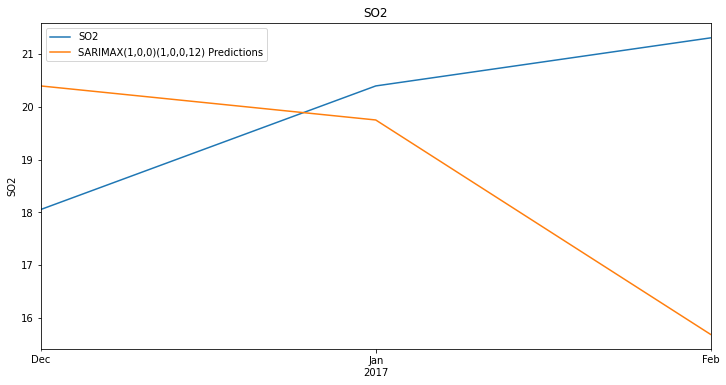

In [527]:
# Plot predictions against known values
title = 'SO2'
ylabel = 'SO2'
xlabel = ''

ax = test['SO2'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

##### (Evaluate the model)

In [528]:
# SO2
# MSE
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['SO2'], predictions)
print(f'SARIMAX(1,0,0)(1,0,0,12) MSE Error: {error:11.10}')

ARIMA(1,0,0)(1,0,0,12) MSE Error: 12.47850936


In [529]:
# RMSE
from statsmodels.tools.eval_measures import rmse

error = rmse(test['SO2'], predictions)
print(f'SARIMAX(1,0,0)(1,0,0,12) RMSE Error: {error:11.10}')

SARIMAX(1,0,0)(1,0,0,12) RMSE Error: 3.532493363


##### (Retrain the model on the full data, and forecast the future)

In [531]:
# SO2
model = SARIMAX(df['SO2'],order=(1,0,0), seasonal_order=(1,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+3,typ='levels').rename('SARIMAX(1,0,0)(1,0,0,12) Forecast')

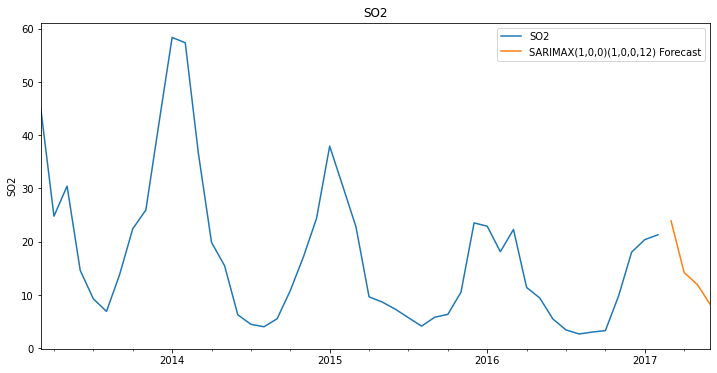

In [532]:

title = 'SO2'
ylabel='SO2'
xlabel=''

ax = df['SO2'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [533]:
# shows much more seasonality than plain ARIMA model